# Домашнє завдання 1

In [96]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import confusion_matrix



## 1. Завантаження даних Iris

In [97]:
iris = load_iris()

# Створення DataFrame:
# - data: містить ознаки (sepal length, sepal width, petal length, petal width)
# - target: містить числові мітки класів (0, 1, 2)
# - target_names: містить назви класів ('setosa', 'versicolor', 'virginica')
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Додамо назви класів для зручності
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Видалимо колонку 'target', оскільки вона дублює інформацію в 'species'
# df.drop(columns=['target'], inplace=True)

print(df.head(1))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   

   target species  
0       0  setosa  


In [98]:
df = df.rename(columns={
    'sepal length (cm)': 'sepal_length',
    'sepal width (cm)': 'sepal_width',
    'petal length (cm)': 'petal_length',
    'petal width (cm)': 'petal_width'
})
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  target species
0           5.1          3.5           1.4          0.2       0  setosa
1           4.9          3.0           1.4          0.2       0  setosa
2           4.7          3.2           1.3          0.2       0  setosa
3           4.6          3.1           1.5          0.2       0  setosa
4           5.0          3.6           1.4          0.2       0  setosa


## 2. Базові статистичні характеристики

In [99]:
# Статистичні характеристики
stats = df.describe()
print(stats)

       sepal_length  sepal_width  petal_length  petal_width      target
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.057333      3.758000     1.199333    1.000000
std        0.828066     0.435866      1.765298     0.762238    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


## 3. Візуалізація

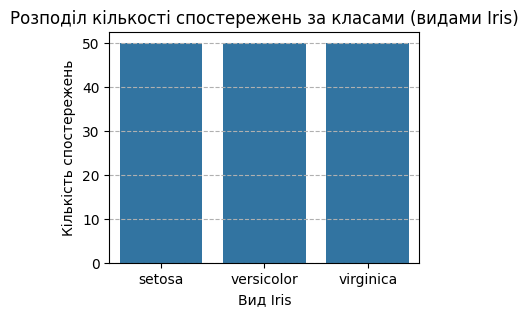

In [100]:
# Візуалізація:
# Побудова графіка розподілу кількості спостережень (рядків) для кожного класу (виду іриса)
plt.figure(figsize=(4, 3))
sns.countplot(x='species', data=df)
plt.title('Розподіл кількості спостережень за класами (видами Iris)')
plt.xlabel('Вид Iris')
plt.ylabel('Кількість спостережень')
plt.grid(axis='y', linestyle='--')
plt.show()

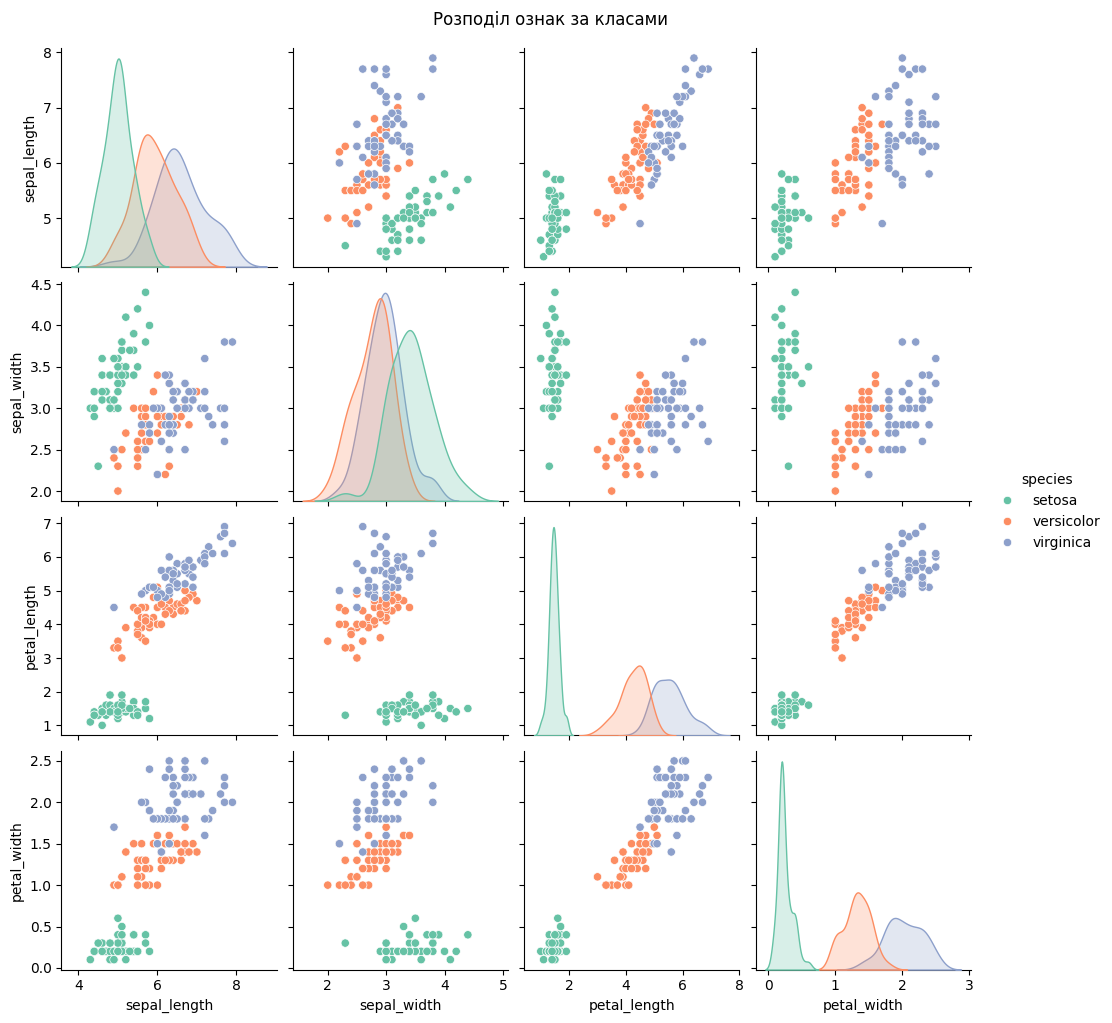

In [101]:
# Візуалізація:
# Побудова парних графіків (pairplot) для всіх ознак, розфарбованих за класами

df_subset = df.iloc[:, :4].copy()
df_subset['species'] = df['species']

# Побудова pairplot
sns.pairplot(df_subset, hue='species', palette='Set2')

plt.suptitle('Розподіл ознак за класами', y=1.02)
plt.show()

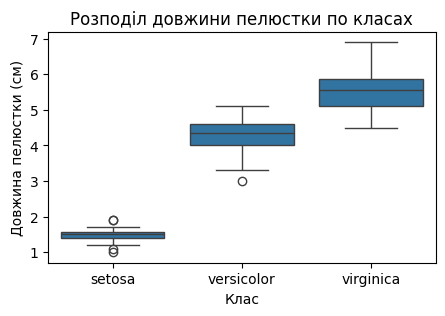

In [102]:
# Візуалізація:
# Побудова коробчастої діаграми (box plot) для довжини пелюстки (petal length) по кожному класу
plt.figure(figsize=(5, 3))
sns.boxplot(x='species', y='petal_length', data=df)
plt.title('Розподіл довжини пелюстки по класах')
plt.xlabel('Клас')
plt.ylabel('Довжина пелюстки (см)')
plt.show()

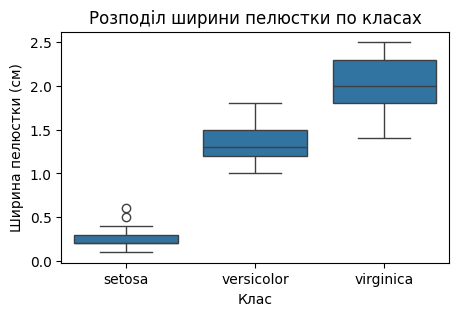

In [103]:
# Візуалізація:
# Побудова коробчастої діаграми (box plot) для ширини пелюстки (petal width) по кожному класу
plt.figure(figsize=(5, 3))
sns.boxplot(x='species', y='petal_width', data=df)
plt.title('Розподіл ширини пелюстки по класах')
plt.xlabel('Клас')
plt.ylabel('Ширина пелюстки (см)')
plt.show()

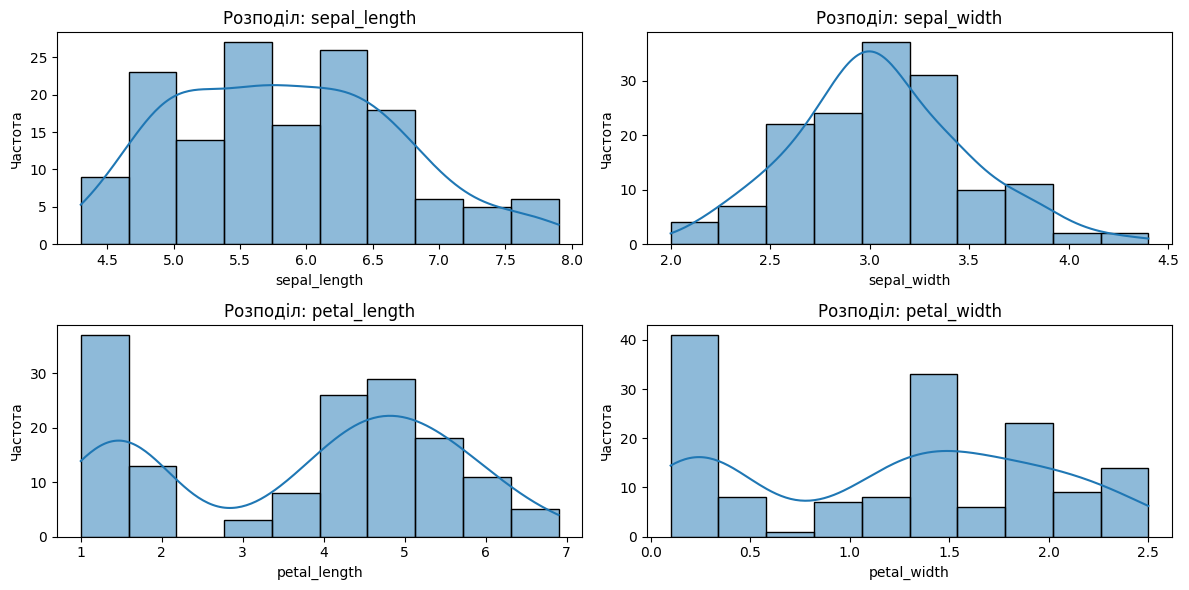

In [104]:
# Візуалізація:
# Побудова гістограм для кожної з ознак
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Визначаємо кількість рядків і колонок для сітки
cols_per_row = 2
rows = 2

fig, axes = plt.subplots(nrows=rows, ncols=cols_per_row, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, bins=10, ax=axes[i])
    axes[i].set_title(f'Розподіл: {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

## 4. Стандартизація даних

In [105]:
# Стандартизація даних
# Стандартизація ознак (mean=0, std=1) для числових ознак   
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Вибираємо лише числові ознаки для стандартизації
X = df[cols]
scaler = StandardScaler()
X_scaled = scaler.set_output(transform='pandas').fit_transform(X)
X_scaled.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


## 5. Спектральна кластерізація

In [107]:
# Кластерізація даних

# Ініціалізація моделі спектральної кластеризації
spectral_model = SpectralClustering(
    n_clusters=3, # Кількість кластерів = 3 (оскільки в Iris 3 класи)
    random_state=42, # Для відтворюваності результатів
    affinity='nearest_neighbors' # Метод побудови графа суміжності
    , assign_labels='kmeans'
)

# Прогнозування кластерів
cluster_labels = spectral_model.fit_predict(X_scaled)

# Додамо спрогнозовані мітки до нашого DataFrame
df['spectral_cluster'] = cluster_labels


In [108]:
print(df.head(10))

   sepal_length  sepal_width  petal_length  petal_width  target species  \
0           5.1          3.5           1.4          0.2       0  setosa   
1           4.9          3.0           1.4          0.2       0  setosa   
2           4.7          3.2           1.3          0.2       0  setosa   
3           4.6          3.1           1.5          0.2       0  setosa   
4           5.0          3.6           1.4          0.2       0  setosa   
5           5.4          3.9           1.7          0.4       0  setosa   
6           4.6          3.4           1.4          0.3       0  setosa   
7           5.0          3.4           1.5          0.2       0  setosa   
8           4.4          2.9           1.4          0.2       0  setosa   
9           4.9          3.1           1.5          0.1       0  setosa   

   spectral_cluster  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
5                 1  
6                 1 

## 6. Порівняння класів

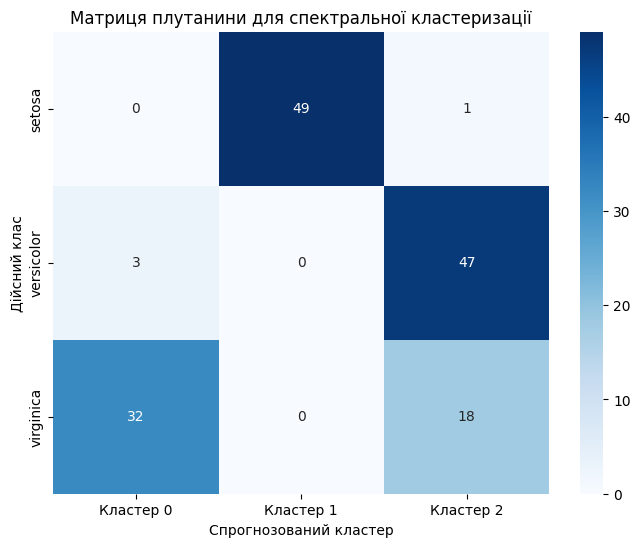

In [109]:
# Створення матриці плутанини
conf_matrix = confusion_matrix(df['target'], df['spectral_cluster'])

# Візуалізація матриці для кращої інтерпретації
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Кластер 0', 'Кластер 1', 'Кластер 2'],
            yticklabels=data.target_names)
plt.title('Матриця плутанини для спектральної кластеризації')
plt.ylabel('Дійсний клас')
plt.xlabel('Спрогнозований кластер')
plt.show()

З приводу встановлення відповідності між кластерами і класами можна сказати наступне:

Справжні мітки маюсть таку відповідьність:
числовим міткам класів (0, 1, 2) - відповідають такі назви класів ('setosa', 'versicolor', 'virginica').

У результатах кластерізації ця відповідьність зміщена таким чином:

- Кластер 1: У цей кластер потрапило 49 зразків класу setosa і майже нічого іншого. Це однозначна відповідність.
Висновок: Кластер 1 = setosa.
- Кластер 2: Тут знаходиться 47 зразків versicolor та 18 зразків virginica. Versicolor домінує.
Висновок: Кластер 2 ≈ versicolor
- Кластер 0: У цьому кластері 32 зразки virginica та лише 3 зразки versicolor. Virginica домінує.
Висновок: Кластер 0 ≈ virginica.

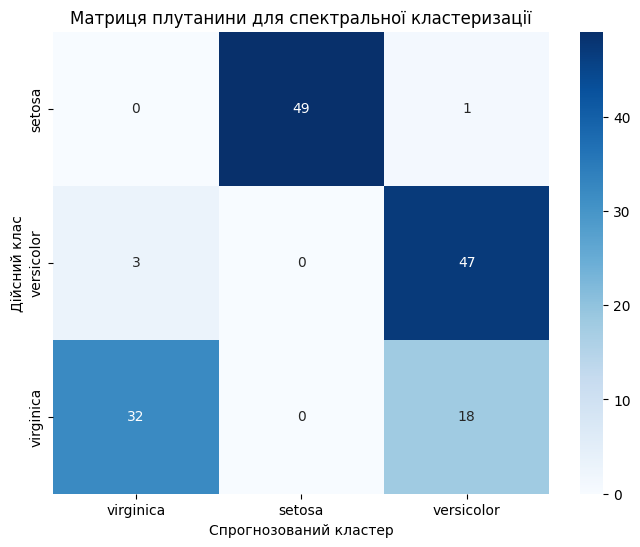

In [110]:
# Повторно виведемо матрицю для наочності після інтерпретації
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['virginica', 'setosa', 'versicolor'],
            yticklabels=data.target_names)
plt.title('Матриця плутанини для спектральної кластеризації')
plt.ylabel('Дійсний клас')
plt.xlabel('Спрогнозований кластер')
plt.show()

## 7. Візуалізація результатів

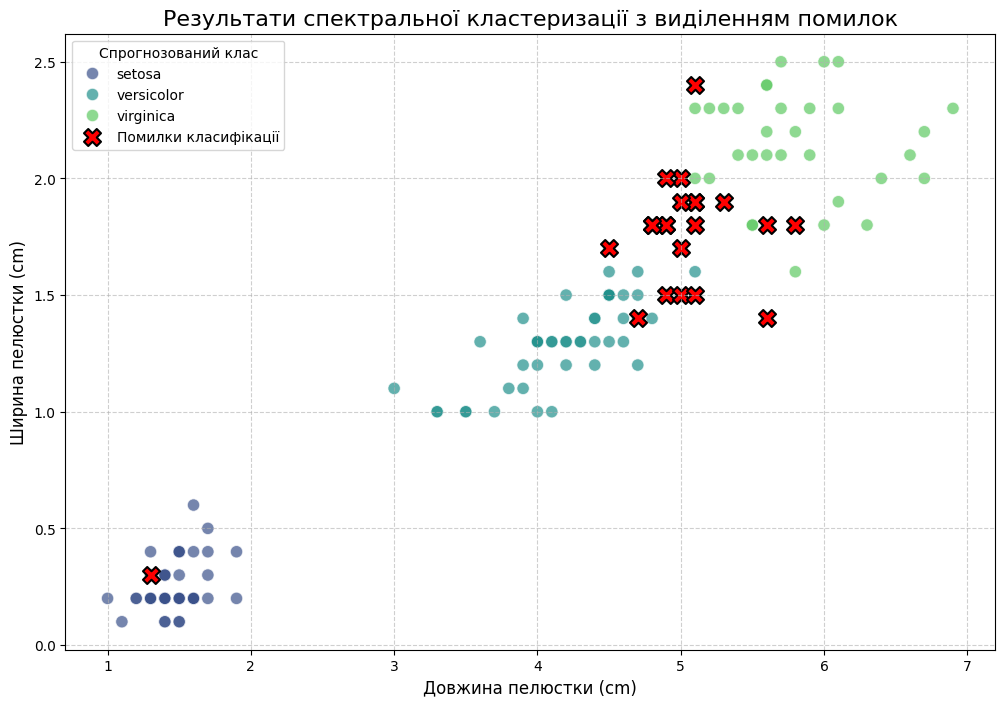

In [ ]:
# Створимо відповідність між номерами кластерів і назвами класів
# З нашого аналізу матриці: 0->virginica, 1->setosa, 2->versicolor
cluster_map = {
    1: 'setosa',
    2: 'versicolor',
    0: 'virginica'
}
df['predicted_species'] = df['spectral_cluster'].map(cluster_map)

# Знайдемо точки, де сталася помилка
errors = df[df['species'] != df['predicted_species']]

# Побудова  візуалізації
plt.figure(figsize=(10, 6))

# Малюємо основний графік з результатами кластеризації
sns.scatterplot(
    data=df,
    x='petal_length',
    y='petal_width',
    hue='predicted_species', # Розфарбовуємо за спрогнозованими назвами
    hue_order=['setosa', 'versicolor', 'virginica'], # Задаємо порядок для консистентності
    palette='viridis',
    s=80, # Розмір точок
    alpha=0.7 # Прозорість
)

# Малюємо помилки поверх основного графіка
sns.scatterplot(
    data=errors,
    x='petal_length',
    y='petal_width',
    color='red',
    marker='X',
    s=150, # Робимо маркери помилок більшими
    edgecolor='black',
    linewidth=1.5,
    label='Помилки класифікації' # Додаємо в легенду
)

plt.title('Результати спектральної кластеризації з виділенням помилок', fontsize=16)
plt.xlabel('Довжина пелюстки (cm)', fontsize=12)
plt.ylabel('Ширина пелюстки (cm)', fontsize=12)
plt.legend(title='Спрогнозований клас')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 8. Висновки

Клас setosa (Кластер 1)
Результат: Майже ідеальний.

- Аналіз: Алгоритм правильно ідентифікував 49 із 50 квіток setosa. Лише один зразок був помилково віднесений до Кластера 2. Це свідчить про те, що характеристики setosa дуже унікальні, і модель легко відокремила цей клас від інших.

Клас versicolor (Кластер 2)
Результат: Добре, але з нюансами.

- Аналіз: Модель правильно знайшла 47 із 50 квіток versicolor і помістила їх у Кластер 2. Однак лише 3 квітки були помилково віднесені до Кластера 0 (кластера virginica). Головна проблема Кластера 2 — його низька чистота: разом із 47 правильними versicolor він містить ще 18 квіток virginica.

Клас virginica (Кластер 0)
Результат: Посередній.

- Аналіз: Це найпроблемніший клас для моделі.
Тільки 32 із 50 квіток virginica були правильно згруповані у Кластер 0.
Значна частина, 18 квіток (36%), була помилково віднесена до Кластера 2, тобто алгоритм сплутав їх з versicolor.

#### Ключові висновки:

1) Алгоритм схильний помилково класифікувати virginica як versicolor, але набагато рідше робить зворотну помилку (лише 3 випадки).

2) Загальна ефективність. Модель успішно виявила існування трьох груп у даних. Вона бездоганно ідентифікувала одну групу (setosa) і змогла частково, але не ідеально, розділити дві інші, що перетинаються.